In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Housing Data

In [2]:
df = pd.read_csv(f"./house_data/kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

# Exploring the data 

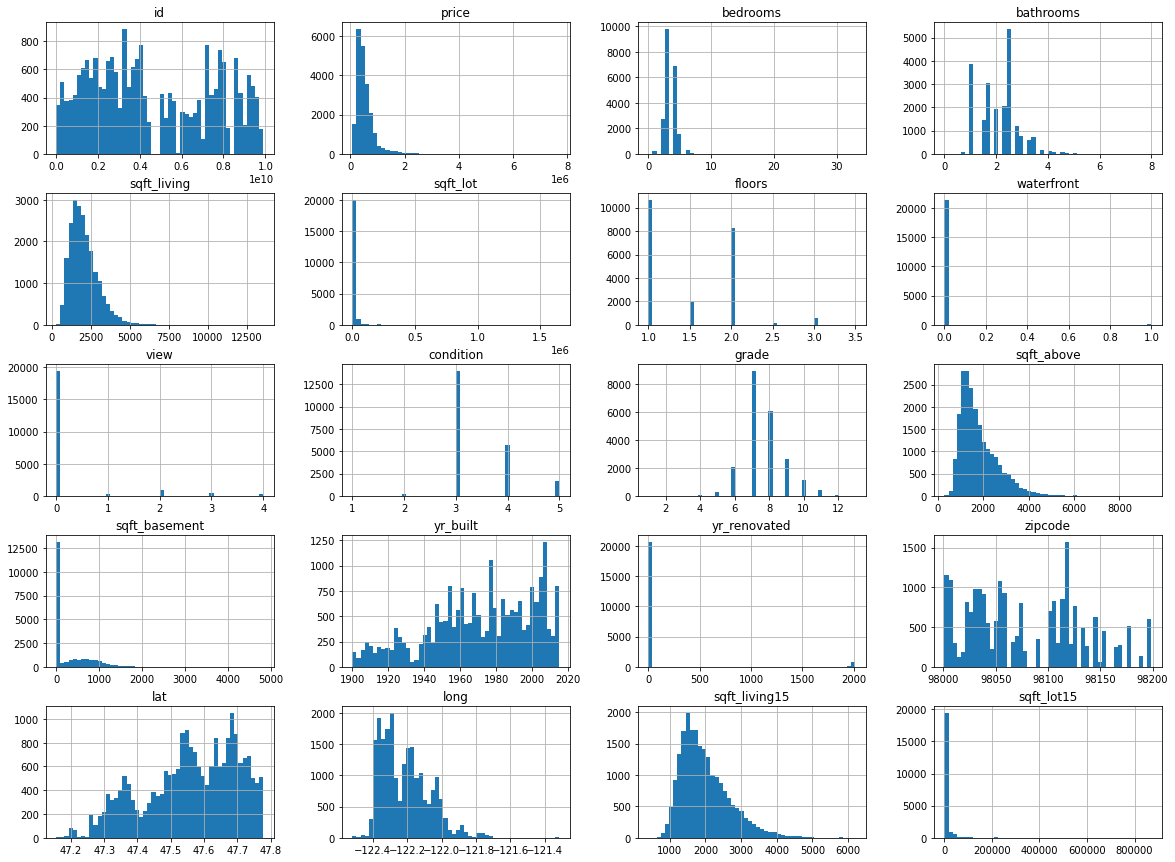

In [3]:
#turicreate.show(sales["CrimeRate"], sales["HousePrice"])
#plt.scatter(philly['CrimeRate'], philly['HousePrice'])
df.hist(bins = 50, figsize = (20, 15))
plt.show()

## Fit the regression model

In [4]:
from sklearn.model_selection import train_test_split
feature_items = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront','view','condition', 'grade', 'sqft_above','sqft_basement']
features = df[feature_items]
target = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

## Slope and intercept values

In [6]:
print('linear model coeff (w): {}'
     .format(model.coef_))
print('linear model intercept (b): {:.3f}'
     .format(model.intercept_))

linear model coeff (w): [-3.07969931e+04 -2.02126526e+04  1.37334087e+02 -2.86126057e-01
  1.89838497e+03  6.12858047e+05  5.85576216e+04  5.47901930e+04
  1.01894313e+05  5.08028664e+01  8.65312203e+01]
linear model intercept (b): -697829.065


In [12]:
def simple_linear_regression(input_feature, output):
    features_LR = df[input_feature]
    target_LR = df[output]
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(features_LR, target_LR, test_size=0.20, random_state=0)
    model_f = LinearRegression().fit(X_train_f, y_train_f)
    return(model_f.intercept_, model_f.coef_)

In [13]:
input_feature_1 = ['sqft_living']
output_1 = ['price']
simple_linear_regression(input_feature_1, output_1)

(array([-48536.69005829]), array([[284.14771038]]))

In [ ]:
def get_regression_predictions(input_feature, intercept, slope)
    [your code here]
return(predicted_output)